<a href="https://colab.research.google.com/github/sudeepmathew/Voc-Analysis/blob/master/Sentiment_Analysis_for_Topic_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Packages

In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
#import nessassary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk import FreqDist
import spacy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
data_4 = pd.read_csv("/content/drive/My Drive/file4.csv")

In [0]:
data_4.shape

(244, 3)

In [0]:
data_4.head()

,Unnamed: 0,Reviews,Topic
0,0,blackwasp thanks automobile encyclopedia sendi...,3
1,3,quickly googled hector baojun chevy captiva tr...,3
2,4,rovingeye quickly googled hector baojun chevy ...,3
3,21,carandbike tweet svp panoramic sunroof mg vect...,3
4,25,like hearing imo mg getting right suv hottest ...,3


In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "get","like","think","new","much",
             "https", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http","would"]
stop_words = stop_words.union(new_words)

# Creating Corpus

In [0]:
corpus = []
for i in range(0, 244):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data_4['Reviews'][i])
    
    #Convert to lowercase
    #text = text.lower()
    
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    #ps=PorterStemmer()
    #Lemmatisation
    #lem = WordNetLemmatizer()
    text = [word for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

# Creating a Bag of Words

In [0]:
bagofwords = []
for i in range (0,244):
  words =corpus[i].split()
  bagofwords.append(words)

In [0]:
#printing bag of word of 100th item in the list
print(bagofwords[100])

['nishsingh', 'look', 'mg', 'hector', 'everything', 'aur', 'kya', 'chahiye', 'cynic', 'let', 'believe', 'mg', 'actually', 'good', 'focus', 'thus', 'far', 'seems', 'infotainment', 'decibel', 'level', 'launch', 'peep', 'performance', 'safety', 'handling', 'recall', 'jaspal', 'bhatti', 'episode', 'ulta', 'pulta', 'said', 'masala', 'tikki', 'chhole', 'right', 'matter', 'tikki', 'stale', 'cooked', 'everyone', 'eat', 'seen', 'chinese', 'vehicle', 'outside', 'india', 'seen', 'dangerous', 'even', 'go', 'minor', 'road', 'undulation', 'rather', 'pay', 'premium', 'actual', 'save', 'cost', 'voice', 'driven', 'infotainment', 'system', 'wheel', 'ranted', 'wait', 'tbhp', 'review', 'happily', 'change', 'mind', 'view', 'totally', 'contrary', 'travelwriter']


# Sentiment Analysis

In [0]:
from textblob import TextBlob
sentiment_text=[TextBlob(review) for review in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.2
blackwasp thanks automobile encyclopedia sending image seen quite time city never got chance click picture seems quite imposing though


In [0]:
sentiments = [[review.sentiment.polarity,str(review)] for review in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','review'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,review
3,0.600000,carandbike tweet svp panoramic sunroof mg vect...
9,0.600000,look nice modded inch forged incubus alloy whe...
193,0.500000,sure whether alloy wheel thread came instagram...
199,0.500000,sreejith v kid going gaga panoramic sunroof se...
121,0.500000,infotainment connectivity better screen infini...
...,...,...
188,-0.187500,sreejinair dont go paid review anyone doesnt m...
33,-0.229167,pulse fear weak sunroof might attract thief st...
66,-0.289286,ankur fox expressed others thread response lag...
131,-0.600000,crazy driver


# Sentiment Distribution for Topic # 4

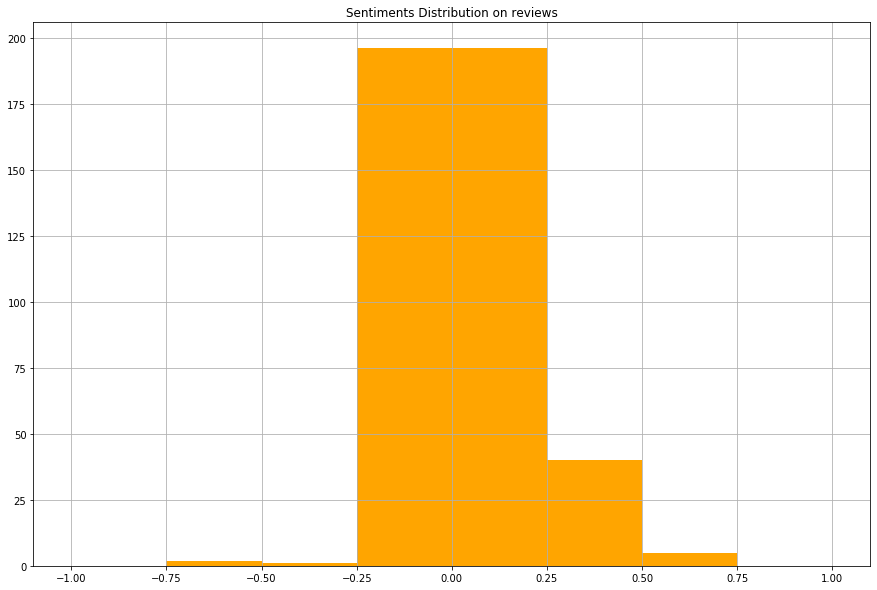

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='orange')
plt.title('Sentiments Distribution on reviews')
plt.show()

In [0]:
sentiment_df.to_csv('sent_file_top4_new.csv') 